In [1]:
import netneurotools.datasets
import numpy as np
from msapy import msa, utils as ut, plottings as pl
import matplotlib.pyplot as plt

import seaborn as sns

from copy import deepcopy


from numba import njit

from netneurotools.metrics import communicability_wei

SEED = 2022
pl.set_style(font_size=8)
my_colors = ['#006685', '#3FA5C4', '#FFFFFF', '#E84653', '#BF003F']
colormap = sns.blend_palette(my_colors,as_cmap=True)
rng = np.random.default_rng(seed=SEED)

In [2]:
@njit
def simple_dynamical_system(adjacency_matrix,input_matrix):
    X = np.zeros((input_matrix.shape[0], input_matrix.shape[1]))

    for timepoint in range(input_matrix.shape[1] - 1):
        X[:, timepoint + 1] = np.tanh(adjacency_matrix @ X[:, timepoint] + input_matrix[:,timepoint])

    return X

def normer(x):
    return (x - x.min()) / (x.max() - x.min())

def lesion_simple_nodes(complements, network, index, input):
    if len(complements) == len(network) - 1:
       return 0.0

    lesioned_network = deepcopy(network)
    for target in complements:
      lesioned_network[:,target] = 0.0
    dynamics = simple_dynamical_system(lesioned_network,input)

    lesioned_signal = dynamics[index,10:]
    return float(lesioned_signal.mean())

In [3]:
human = netneurotools.datasets.fetch_connectome('human_struct_scale033')
rat = netneurotools.datasets.fetch_connectome('rat')
mouse = netneurotools.datasets.fetch_connectome('mouse')
drosophila = netneurotools.datasets.fetch_connectome('drosophila')

<AxesSubplot:>

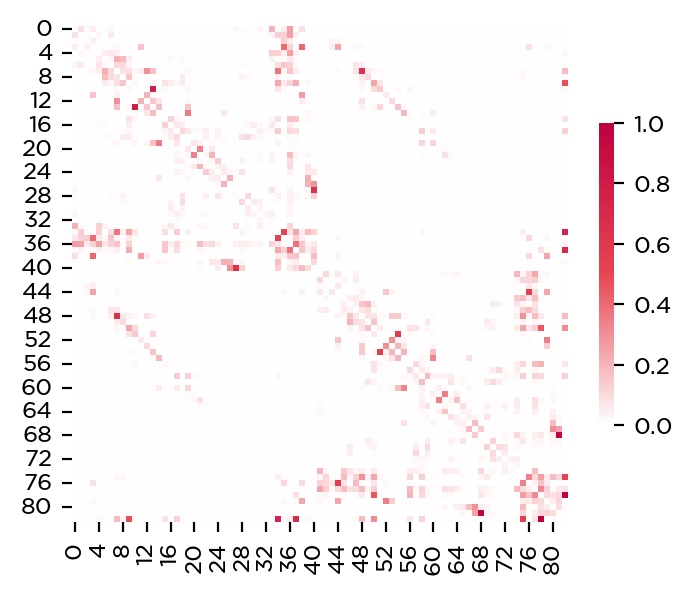

In [5]:
connectivity = normer(human['conn'])
n_neurons = len(connectivity)
communication_mask = np.where(communicability_wei(connectivity)!=0,1,0)


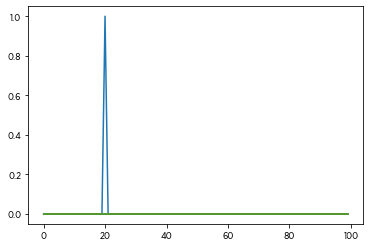

In [8]:
timesteps = 100

careers = [np.sin(np.linspace(1,i,timesteps)).squeeze() for i in range(n_neurons)]
input = np.array(careers) *0.1


input = np.zeros((n_neurons,timesteps))

input[0,20:21] += 1
#input[1] = careers[-1]
plt.plot(input.T);

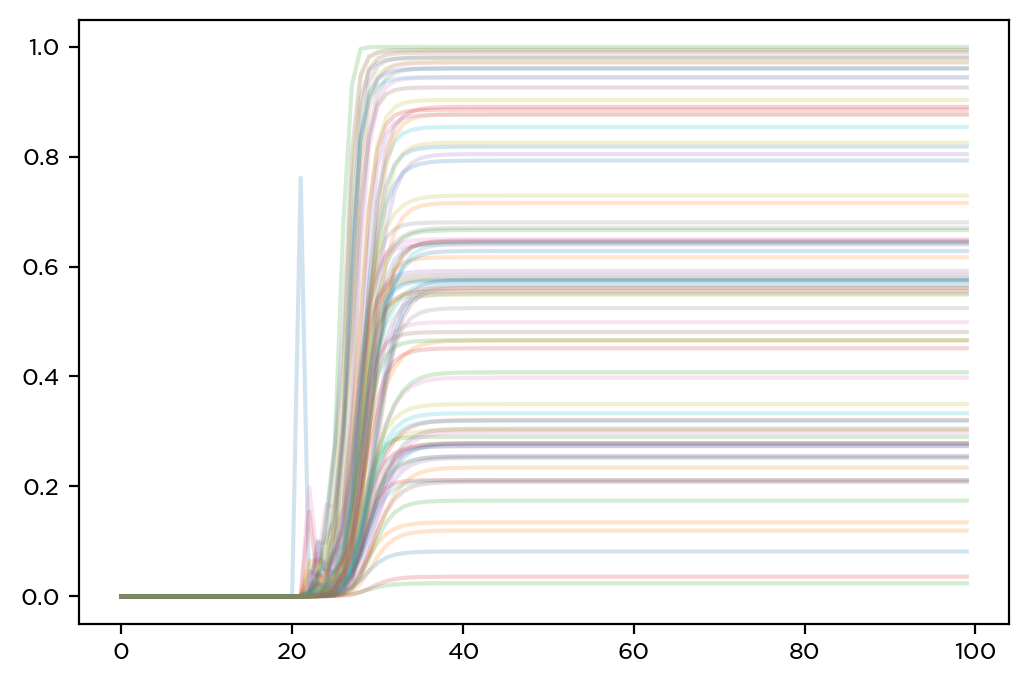

In [11]:
simple_dynamics = simple_dynamical_system(connectivity,input)

plt.figure(dpi=200)
for i in range(len(connectivity)):
    plt.plot(simple_dynamics.T[:,i],label=i,alpha=0.2)

In [12]:
lesion_params = {'network': connectivity, 'input': input}
ci_mat = msa.estimate_causal_influences(elements=list(range(n_neurons)),
                                        objective_function=lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=-1)

working on node number 0 from 83 nodes.


Playing the games:   0%|          | 32/78866 [00:00<26:34, 49.43it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 1 from 83 nodes.


Playing the games:   0%|          | 32/78865 [00:00<25:59, 50.54it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 2 from 83 nodes.


Playing the games:   0%|          | 32/78889 [00:00<24:46, 53.05it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 3 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<22:20, 58.82it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 4 from 83 nodes.


Playing the games:   0%|          | 32/78876 [00:00<25:02, 52.49it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 5 from 83 nodes.


Playing the games:   0%|          | 32/78874 [00:00<24:49, 52.94it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 6 from 83 nodes.


Playing the games:   0%|          | 32/78890 [00:00<33:29, 39.25it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on con

working on node number 7 from 83 nodes.


Playing the games:   0%|          | 32/78890 [00:00<23:25, 56.11it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 8 from 83 nodes.


Playing the games:   0%|          | 32/78893 [00:00<25:58, 50.58it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 9 from 83 nodes.


Playing the games:   0%|          | 32/78887 [00:00<24:37, 53.36it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 10 from 83 nodes.


Playing the games:   0%|          | 32/78876 [00:00<24:06, 54.49it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 11 from 83 nodes.


Playing the games:   0%|          | 32/78846 [00:00<24:22, 53.88it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 12 from 83 nodes.


Playing the games:   0%|          | 32/78880 [00:00<24:13, 54.25it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 13 from 83 nodes.


Playing the games:   0%|          | 32/78892 [00:00<24:09, 54.40it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 14 from 83 nodes.


Playing the games:   0%|          | 32/78866 [00:00<24:03, 54.61it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 15 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<23:43, 55.39it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 16 from 83 nodes.


Playing the games:   0%|          | 32/78875 [00:00<27:00, 48.66it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 17 from 83 nodes.


Playing the games:   0%|          | 32/78885 [00:00<23:54, 54.96it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 18 from 83 nodes.


Playing the games:   0%|          | 32/78879 [00:00<24:02, 54.67it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 19 from 83 nodes.


Playing the games:   0%|          | 32/78882 [00:00<24:52, 52.83it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 20 from 83 nodes.


Playing the games:   0%|          | 32/78900 [00:00<23:50, 55.14it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 21 from 83 nodes.


Playing the games:   0%|          | 32/78888 [00:00<25:41, 51.16it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 22 from 83 nodes.


Playing the games:   0%|          | 32/78885 [00:00<24:08, 54.42it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 23 from 83 nodes.


Playing the games:   0%|          | 32/78893 [00:00<27:37, 47.58it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 24 from 83 nodes.


Playing the games:   0%|          | 32/78858 [00:00<27:43, 47.38it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 25 from 83 nodes.


Playing the games:   0%|          | 32/78865 [00:00<24:30, 53.60it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 26 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<24:14, 54.22it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 27 from 83 nodes.


Playing the games:   0%|          | 32/78873 [00:00<24:25, 53.81it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 28 from 83 nodes.


Playing the games:   0%|          | 32/78879 [00:00<24:05, 54.56it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 29 from 83 nodes.


Playing the games:   0%|          | 32/78886 [00:00<24:36, 53.42it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 30 from 83 nodes.


Playing the games:   0%|          | 32/78893 [00:00<25:17, 51.98it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 31 from 83 nodes.


Playing the games:   0%|          | 32/78866 [00:00<25:13, 52.08it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 32 from 83 nodes.


Playing the games:   0%|          | 32/78869 [00:00<24:55, 52.71it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 33 from 83 nodes.


Playing the games:   0%|          | 32/78896 [00:00<24:18, 54.09it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 34 from 83 nodes.


Playing the games:   0%|          | 32/78880 [00:00<23:49, 55.18it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 35 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<24:19, 54.02it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 36 from 83 nodes.


Playing the games:   0%|          | 32/78864 [00:00<23:37, 55.63it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 37 from 83 nodes.


Playing the games:   0%|          | 32/78917 [00:00<24:11, 54.36it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 38 from 83 nodes.


Playing the games:   0%|          | 32/78884 [00:00<23:54, 54.97it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 39 from 83 nodes.


Playing the games:   0%|          | 32/78890 [00:00<24:20, 53.98it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 40 from 83 nodes.


Playing the games:   0%|          | 32/78888 [00:00<23:53, 54.99it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 41 from 83 nodes.


Playing the games:   0%|          | 32/78897 [00:00<24:17, 54.10it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 42 from 83 nodes.


Playing the games:   0%|          | 32/78877 [00:00<24:09, 54.40it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, 

working on node number 43 from 83 nodes.


Playing the games:   0%|          | 32/78891 [00:00<25:28, 51.60it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 44 from 83 nodes.


Playing the games:   0%|          | 32/78880 [00:00<24:13, 54.26it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 45 from 83 nodes.


Playing the games:   0%|          | 32/78890 [00:00<24:20, 54.00it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 46 from 83 nodes.


Playing the games:   0%|          | 32/78866 [00:00<27:46, 47.29it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 47 from 83 nodes.


Playing the games:   0%|          | 32/78863 [00:00<24:15, 54.16it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 48 from 83 nodes.


Playing the games:   0%|          | 32/78894 [00:00<24:01, 54.70it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 49 from 83 nodes.


Playing the games:   0%|          | 32/78856 [00:00<24:06, 54.47it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 50 from 83 nodes.


Playing the games:   0%|          | 32/78873 [00:00<25:45, 51.00it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 51 from 83 nodes.


Playing the games:   0%|          | 32/78880 [00:00<24:18, 54.05it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 52 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<23:41, 55.48it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProje

working on node number 53 from 83 nodes.


Playing the games:   0%|          | 32/78874 [00:00<24:24, 53.83it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 54 from 83 nodes.


Playing the games:   0%|          | 32/78884 [00:00<31:59, 41.09it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, 

working on node number 55 from 83 nodes.


Playing the games:   0%|          | 32/78896 [00:00<24:18, 54.08it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 56 from 83 nodes.


Playing the games:   0%|          | 32/78879 [00:00<24:19, 54.01it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 57 from 83 nodes.


Playing the games:   0%|          | 32/78879 [00:00<25:47, 50.94it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 58 from 83 nodes.


Playing the games:   0%|          | 32/78882 [00:00<24:47, 53.01it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 59 from 83 nodes.


Playing the games:   0%|          | 32/78905 [00:00<24:25, 53.82it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 60 from 83 nodes.


Playing the games:   0%|          | 32/78884 [00:00<25:52, 50.80it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 61 from 83 nodes.


Playing the games:   0%|          | 32/78870 [00:00<26:07, 50.29it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 62 from 83 nodes.


Playing the games:   0%|          | 32/78883 [00:00<31:09, 42.17it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on con

working on node number 63 from 83 nodes.


Playing the games:   0%|          | 32/78881 [00:00<24:41, 53.23it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, 

working on node number 64 from 83 nodes.


Playing the games:   0%|          | 32/78909 [00:00<33:45, 38.94it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on con

working on node number 65 from 83 nodes.


Playing the games:   0%|          | 32/78892 [00:00<24:57, 52.67it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 66 from 83 nodes.


Playing the games:   0%|          | 32/78907 [00:00<23:33, 55.82it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 67 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<23:47, 55.24it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 68 from 83 nodes.


Playing the games:   0%|          | 32/78895 [00:00<25:16, 51.99it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 69 from 83 nodes.


Playing the games:   0%|          | 32/78868 [00:00<24:53, 52.78it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 70 from 83 nodes.


Playing the games:   0%|          | 32/78892 [00:00<24:21, 53.97it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 71 from 83 nodes.


Playing the games:   0%|          | 32/78874 [00:00<29:40, 44.29it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 72 from 83 nodes.


Playing the games:   0%|          | 32/78887 [00:00<23:39, 55.56it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 73 from 83 nodes.


Playing the games:   0%|          | 32/78909 [00:00<25:38, 51.26it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 74 from 83 nodes.


Playing the games:   0%|          | 32/78855 [00:00<23:51, 55.06it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 75 from 83 nodes.


Playing the games:   0%|          | 32/78832 [00:00<24:30, 53.60it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on conti

working on node number 76 from 83 nodes.


Playing the games:   0%|          | 32/78877 [00:00<28:23, 46.28it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 77 from 83 nodes.


Playing the games:   0%|          | 32/78876 [00:00<23:48, 55.17it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

working on node number 78 from 83 nodes.


Playing the games:   0%|          | 32/78878 [00:00<31:43, 41.43it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d,

working on node number 79 from 83 nodes.


Playing the games:   0%|          | 32/78896 [00:00<25:39, 51.21it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 80 from 83 nodes.


Playing the games:   0%|          | 32/78902 [00:00<25:00, 52.56it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/kayson/anaconda3/envs/pythonProje

working on node number 81 from 83 nodes.


Playing the games:   0%|          | 32/78880 [00:00<23:37, 55.63it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProje

working on node number 82 from 83 nodes.


Playing the games:   0%|          | 32/78857 [00:00<24:29, 53.64it/s]/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_16527/1647899244.py:6: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/kayson/anaconda3/envs/pythonProject/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_16527/1647899244.py:6: N

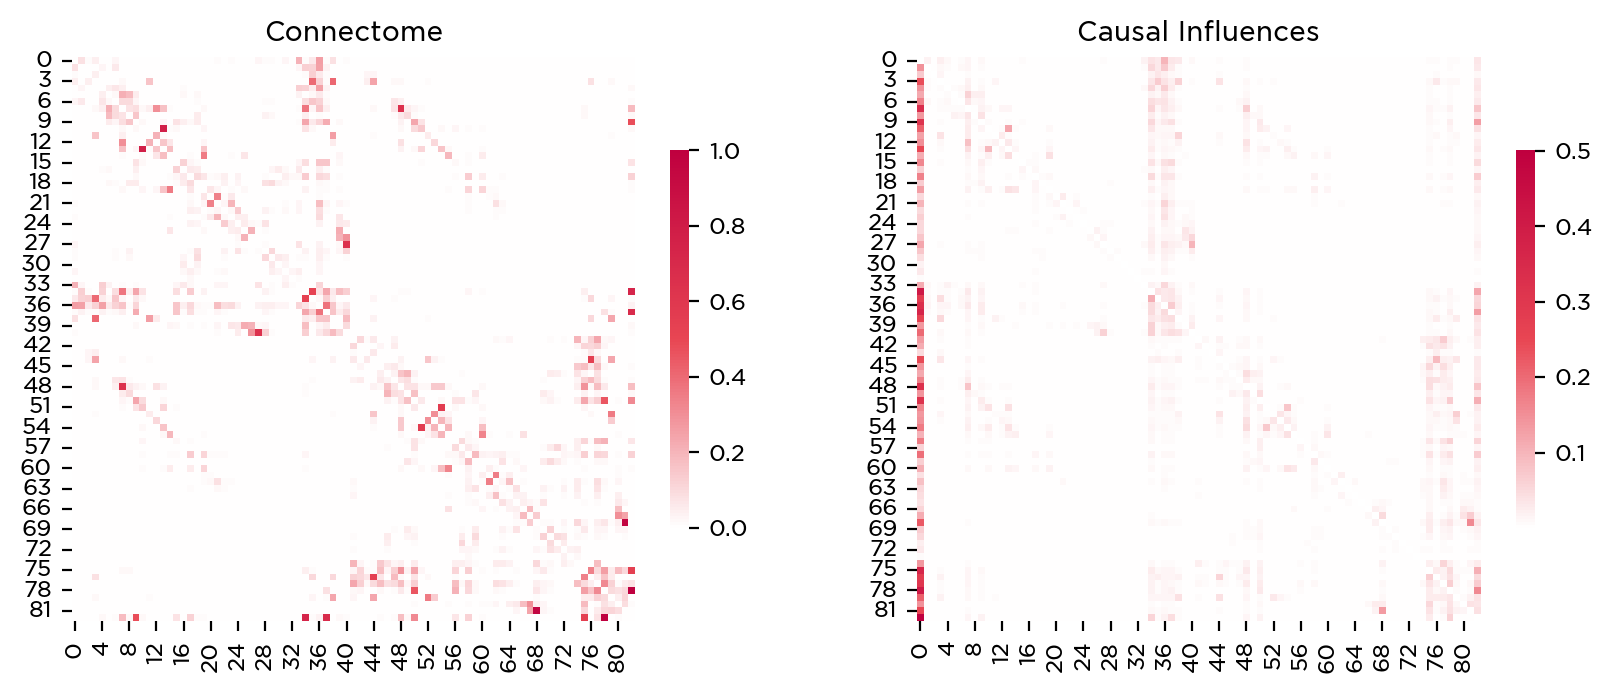

In [13]:
fig,axes = plt.subplot_mosaic(
    [['A','B']],figsize=(10,5),dpi=200)
sns.heatmap(connectivity,square=True,center=0,
            cmap=colormap,cbar_kws={"shrink": .5},ax=axes['A'],linewidths=0., linecolor='k')
sns.heatmap(ci_mat*communication_mask,square=True,
            cmap=colormap,center=0,cbar_kws={"shrink": .5},ax=axes['B'],linewidths=0., linecolor='k')
axes['A'].title.set_text('Connectome')
axes['B'].title.set_text('Causal Influences')

In [14]:
human_comunicability = communicability_wei(connectivity)
normalized_ci = normer(ci_mat*communication_mask)
normalized_comm = normer(human_comunicability)
diff = normalized_ci - normalized_comm

/tmp/ipykernel_16527/2986022296.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


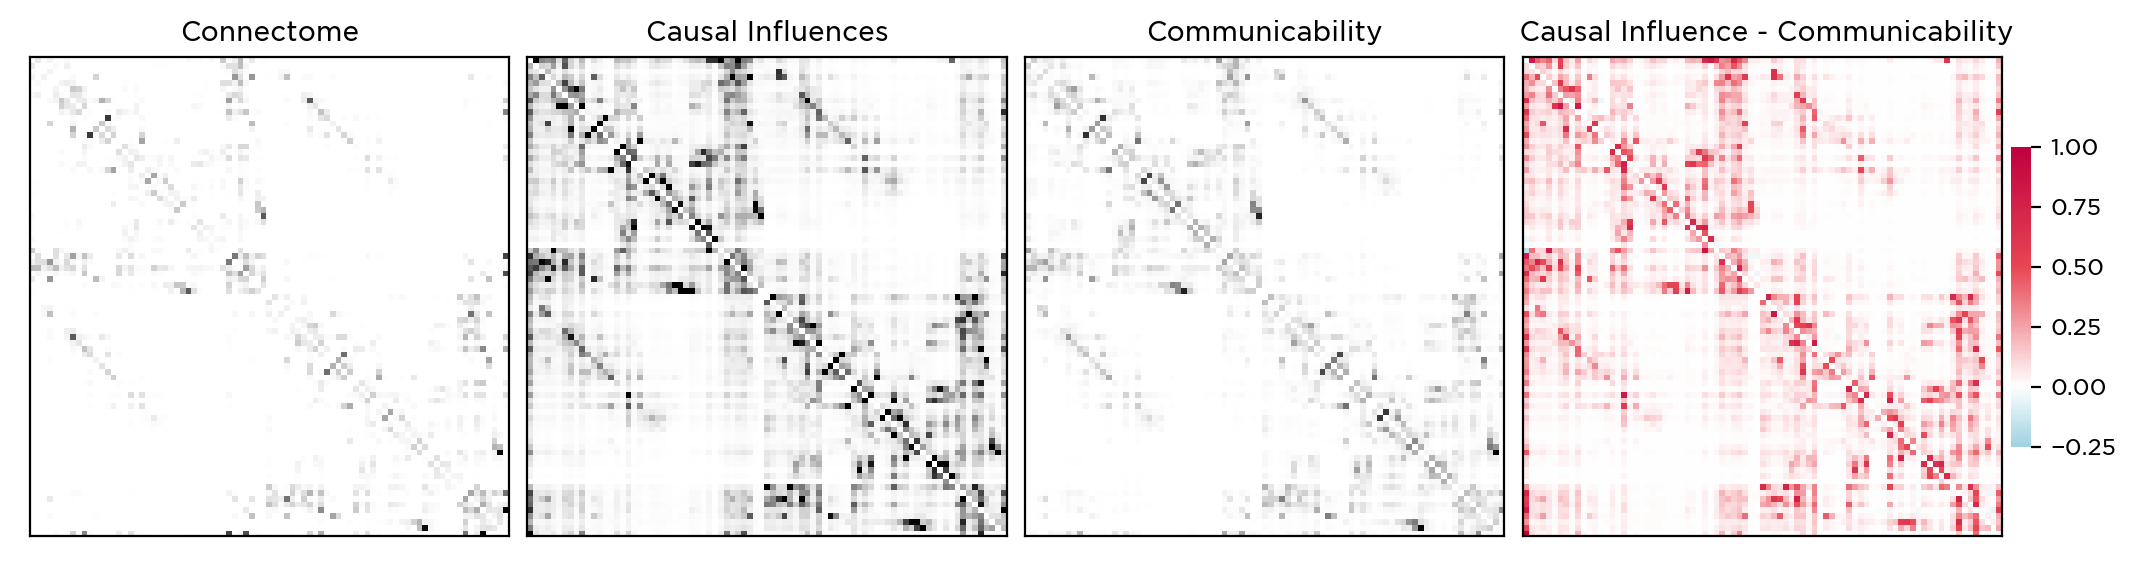

In [15]:
lower = np.percentile(diff, 5)
upper = np.percentile(diff, 95)
diff[(diff < upper) & (diff > lower)] = 0
fig, axes = plt.subplot_mosaic(
    [['X', 'A', 'B', 'C']], figsize=(10, 5), dpi=200)

cbar_ax = fig.add_axes([1, .35, .01, .3])

sns.heatmap(connectivity, square=True,
            cmap='binary', cbar_kws={"shrink": .5},
            ax=axes['X'], linewidths=0., linecolor='k',
            xticklabels=False,yticklabels=False, cbar = False)
sns.heatmap(diff, square=True,
            cmap=colormap, center=0, cbar_kws={"shrink": .5}, ax=axes['C'], linewidths=0.,vmax=1,vmin=-0.25, linecolor='k',xticklabels=False,yticklabels=False, cbar_ax = cbar_ax)
sns.heatmap(normalized_comm, square=True,
            cmap='binary', cbar_kws={"shrink": .5}, ax=axes['B'], linewidths=0., linecolor='k',xticklabels=False,yticklabels=False,cbar=False)
sns.heatmap(normalized_ci, square=True,
            cmap='binary', cbar_kws={"shrink": .5}, ax=axes['A'], linewidths=0., linecolor='k',xticklabels=False,yticklabels=False,cbar=False)
axes['C'].title.set_text(' Causal Influence - Communicability')
axes['B'].title.set_text('Communicability')
axes['A'].title.set_text('Causal Influences')
axes['X'].title.set_text('Connectome')

for ax in axes:
    axes[ax].spines['right'].set_visible(True)
    axes[ax].spines['top'].set_visible(True)
    axes[ax].spines['bottom'].set_visible(True)
    axes[ax].spines['left'].set_visible(True)

fig.tight_layout(pad=0.4)
#fig.legend(bbox_to_anchor=(0.97, 0.5),frameon=False,handletextpad=0.01)

#plt.savefig(f"CO vs CI.pdf",dpi=600,bbox_inches='tight')